In [132]:
import pandas as pd
signal = 'signaali.csv'

df = pd.read_csv(signal)
df.head()


,Aika,Signaali
0,0.023641,-0.312650
1,0.031545,-0.273663
2,0.039449,-0.238305
3,0.047353,-0.085638
4,0.055288,-0.172576


Text(0.5, 1.0, 'Testisignaali')

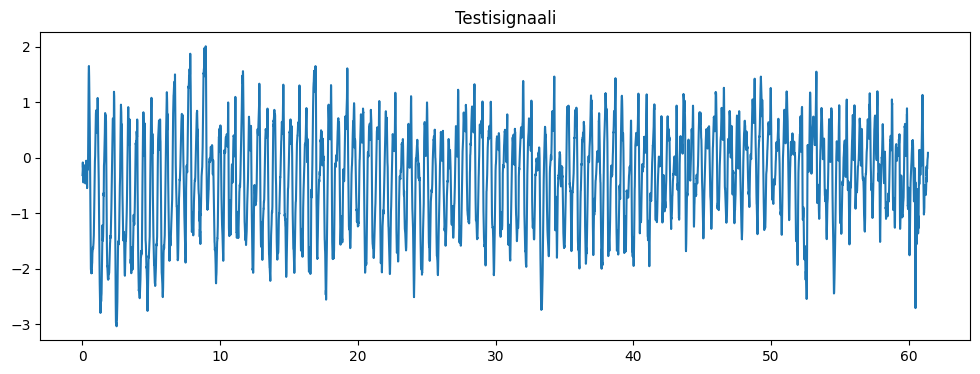

In [133]:


import numpy as np
import matplotlib.pyplot as plt

#Generoidaan testiksi
t = df['Aika']
f = df['Signaali']

#f = np.sin(taajuus1*2*np.pi*t) + np.cos(taajuus2*2*np.pi*t) + np.random.randn(len(t))

plt.figure(figsize=(12,4))
plt.plot(t,f)
plt.title('Testisignaali')


Testitiedostossa oli vain 1 signaali, joten sovelsin sitä Fourier-kaavan kanssa. Tehokkain taajuus, mikä kuvaajastakin näkyy on noin 2:n (sekunnin? tiedostossa ei ilmaistu tarkkuutta selkeämmin) kohdalla.
Suuri saatu teho on 432.4106226450817


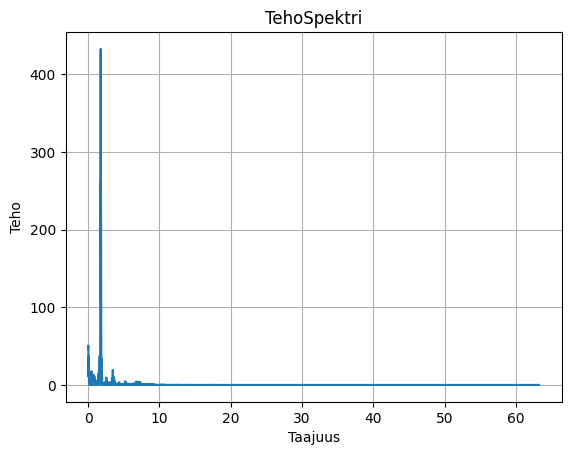

In [134]:
#Fourier-muunnoksen laskeminen:
#Aika t
#Signaali f
N = len(f) #Datapisteiden lukumäärä signaalissa
dt = t[1]-t[0] #Näytteenottoväli, datapisteiden ajallinen välimatka

#Lasketaan FOURIER
fourier = np.fft.fft(f,N)

#Lasketaan Tehospektri (Power Spectral Density, PSD)
psd = fourier*np.conj(fourier)/N

freq = 1/(dt*N)*np.arange(N) #Taajuudet
L = np.arange(1,np.floor(N/2),dtype='int') #Määritetään käytettävät Tehospektrin arvot

PSD = np.array([freq[L],psd[L].real]) #Taajuudet ja Tehospektrin Arvot


plt.plot(PSD[0,:],PSD[1,:])
plt.grid()
plt.title('TehoSpektri')
plt.xlabel('Taajuus')
plt.ylabel('Teho')



print('Testitiedostossa oli vain 1 signaali, joten sovelsin sitä Fourier-kaavan kanssa. Tehokkain taajuus, mikä kuvaajastakin näkyy on noin 2:n (sekunnin? tiedostossa ei ilmaistu tarkkuutta selkeämmin) kohdalla.')
print('Suuri saatu teho on', max(psd[L].real))

